# ITI105 Machine Learning Project

Team members:
* Lye Suh Jeng (7487427Y)
* Lee Li Neng (6203055B)
* Lim Chan Boon (9704541M)
---
Project Problem: 4 (a) as in suggested project:
* The success of the song can often been measured by whether the song is on the Hit Chart such as Billboard Hot 100. It is important for music labels to know what makes a song successful so that they can focus their budget on making songs that has the highest chance of being successful.
---
We want to solve the problem statement by using the follow steps:
1.   Load dataset
2.   Discover & visualize data to gain insights
3.   Prepare data
4.   Split data into train and test datasets
5.   Feature scaling
6.   Train, fine tune and evaluate models
7.   Compare performance of models
8. Deploy the model

# (1) Gather and Load dataset

In [234]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv('https://raw.githubusercontent.com/dy018/project105/main/song_data.csv')

# (2) Discover & visualize data to gain insights

In [235]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [237]:

# Drop song_name since it's not feature to determine song popularity
df.drop(['song_name'], axis=1, inplace=True)

print(">>> Display first 5 records:\n")
df.head()

>>> Display first 5 records:



,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [238]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

* audio_mode, time_signature and key most likely are categorical features. The rest are numeric features

In [239]:
# song_popularity is target. The rest of columns are features
# Get list of features from df
features = df.columns[1:].tolist()

# put features into 2 types: categorical features and numeric features
category_features = ['audio_mode', 'time_signature', 'key']
numeric_features = [feature for feature in features if feature not in category_features]
print(">>> Categorical features are:", category_features)
print(">>> Numeric features are:", numeric_features)


>>> Categorical features are: ['audio_mode', 'time_signature', 'key']
>>> Numeric features are: ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']


In [240]:
# Study each columns in df
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


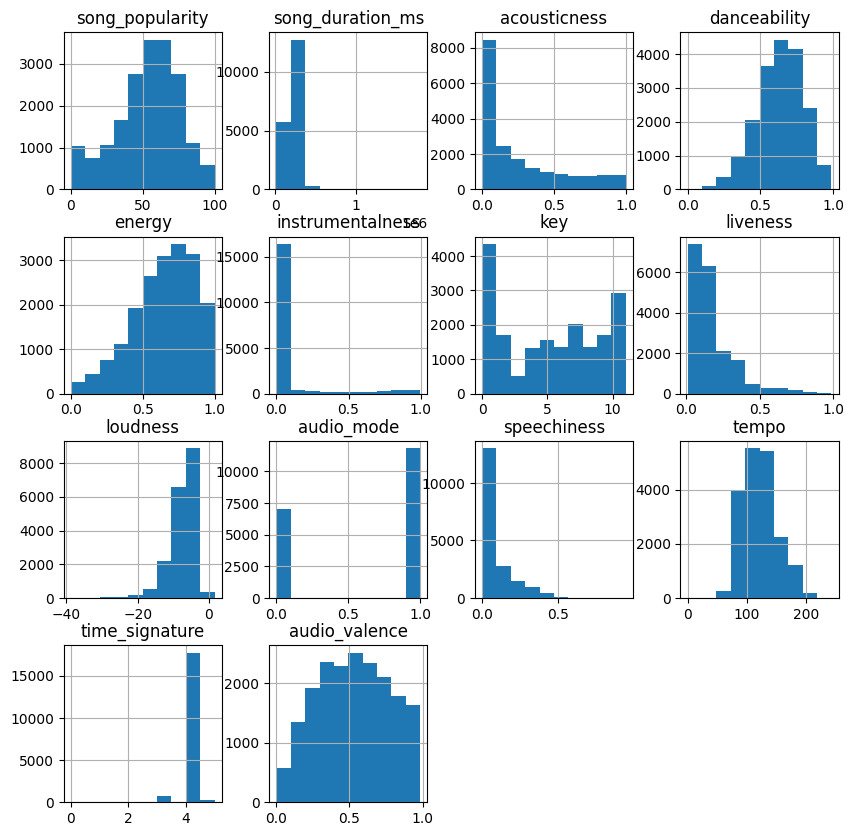

In [241]:
# Plot histograms for df to see data distribution

import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()


* Target = Song_popularity (Popularity score from 0 to 100 with 100 as the most popular song).
* Base on the histogram, the song_popularity is well spreaded bell curve from 0 to 100.

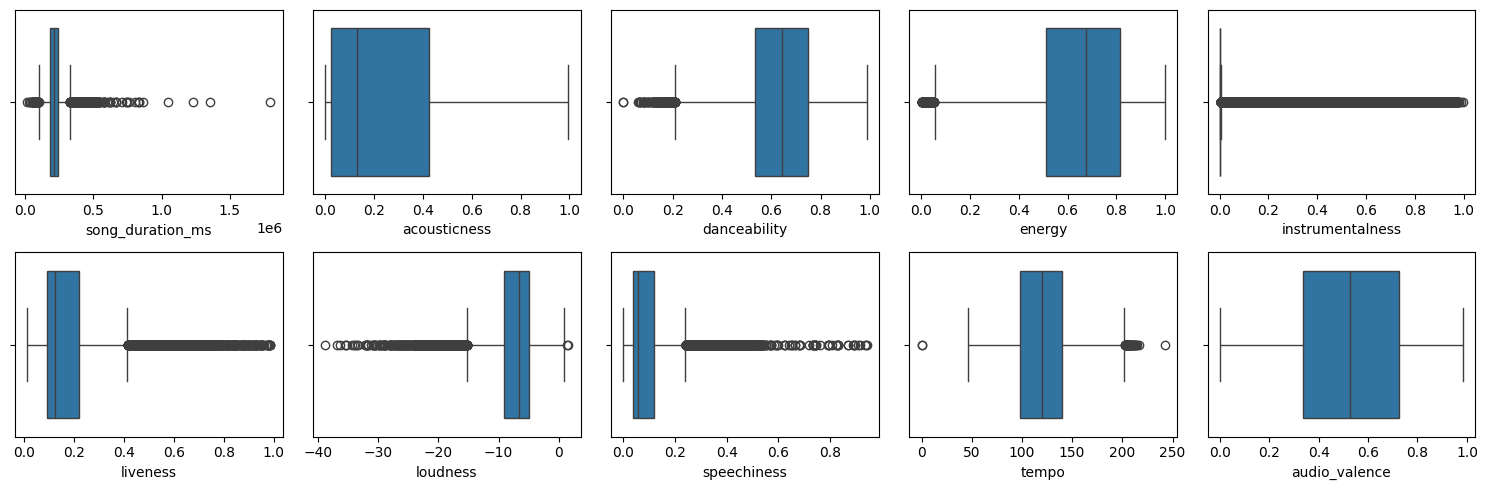

In [242]:
# Plot boxplot for numeric features
fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=df[feature], ax=axs[i // 5, i % 5])

# Adjust the layout so that the plots do not overlap
plt.tight_layout()

# Show the plot
plt.show()


* Observation from boxplots:
** song_duration_ms, danceability, energy, liveness, loudness and speechiness and tempo seem to have outliers

# (3) Prepare data


## (3)(a) Prepare data by removing any duplicat records if any


In [243]:
# Backup original df
df_original = df.copy()

In [244]:
# Remove duplicate rows (if any)

counter = 0
row,col = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(row,col):
    print('>>> The dataset doesn\'t have any duplicates')
else:
    print('>>> Number of duplicates dropped/fixed:', {row-df.shape[0]})
    print(">>> df's shape after removing dupliate rows", df.shape)

>>> Number of duplicates dropped/fixed: {3911}
>>> df's shape after removing dupliate rows (14924, 14)


In [245]:
df3 = df.drop(category_features, axis=1)
df3.head()
corr_matrix = df3.corr()
target_correlation = corr_matrix['song_popularity'].sort_values(ascending=False)
print(target_correlation)

song_popularity     1.000000
danceability        0.056569
loudness            0.052036
speechiness        -0.002000
song_duration_ms   -0.007773
energy             -0.016543
tempo              -0.029500
acousticness       -0.031599
liveness           -0.038503
audio_valence      -0.044001
instrumentalness   -0.093012
Name: song_popularity, dtype: float64


                                         Correlation Matrix                                         


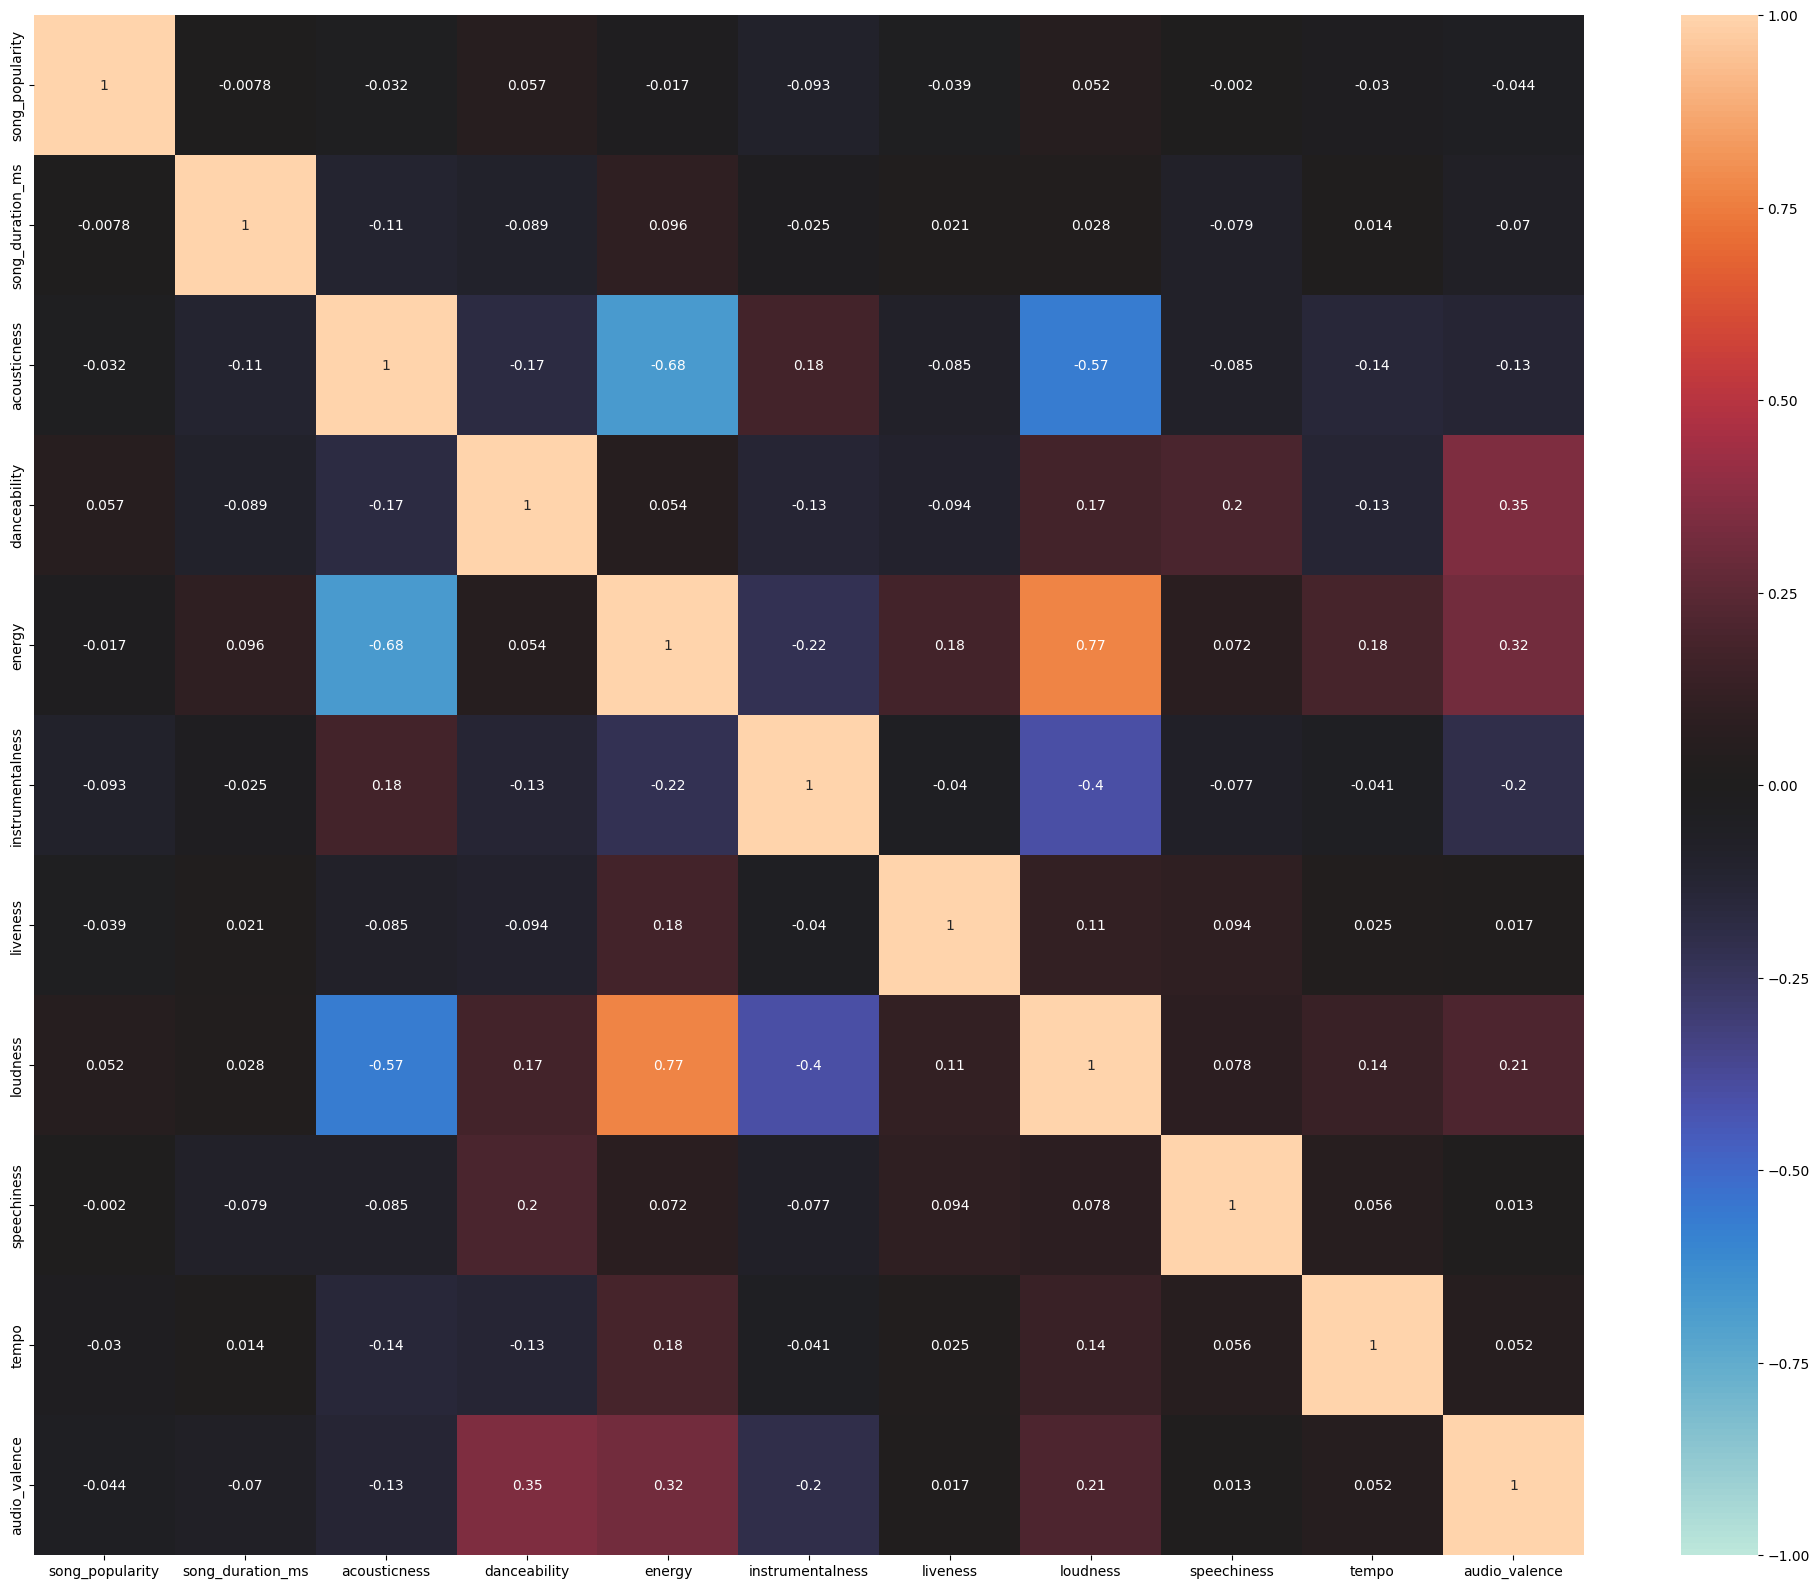

In [246]:
print('Correlation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

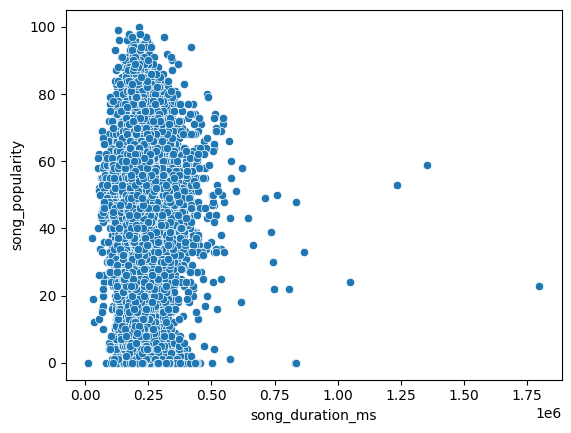

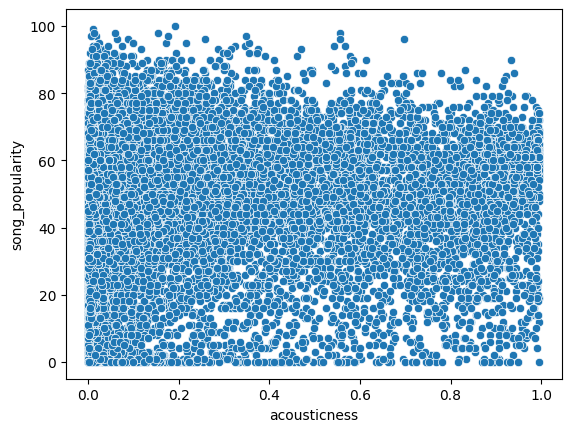

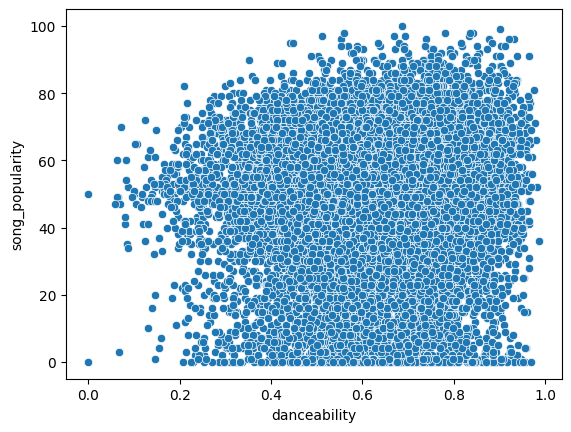

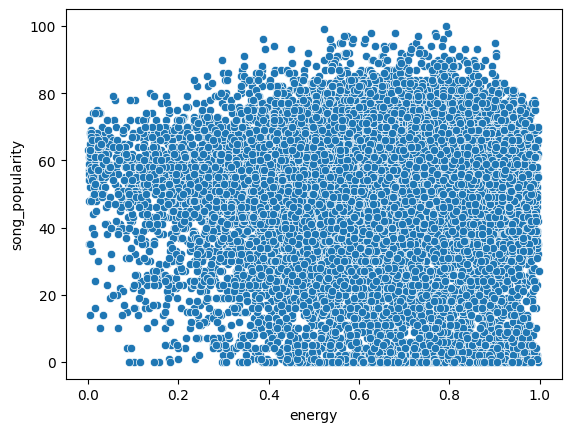

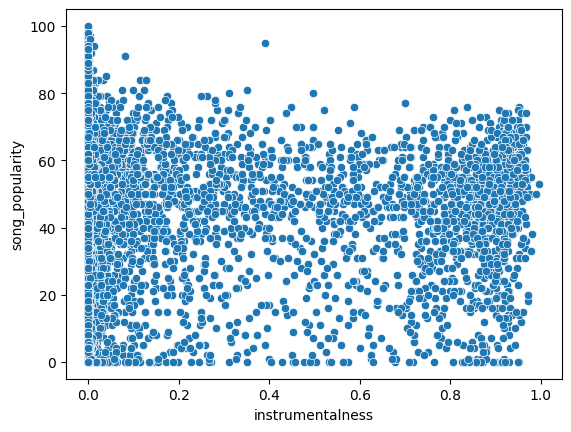

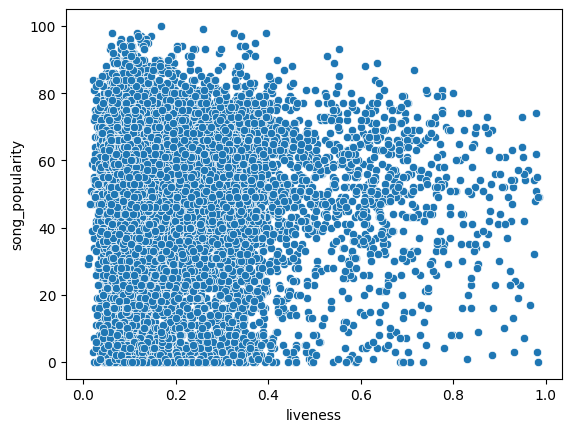

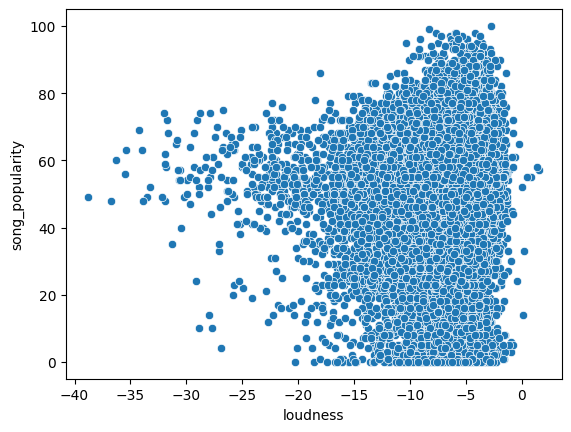

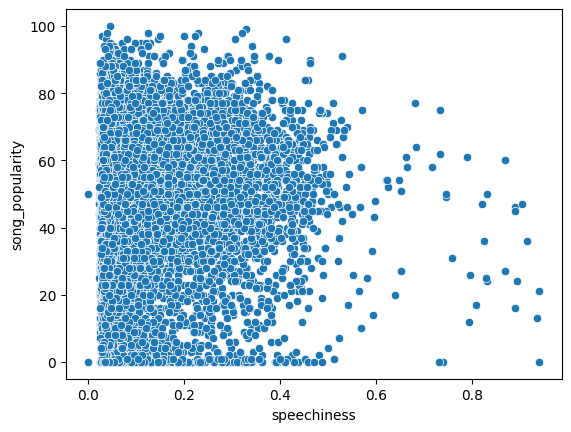

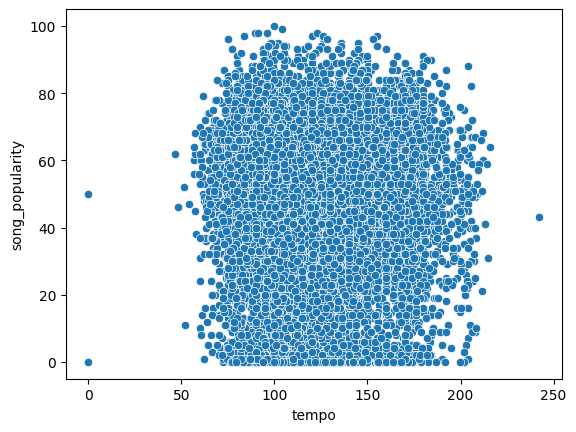

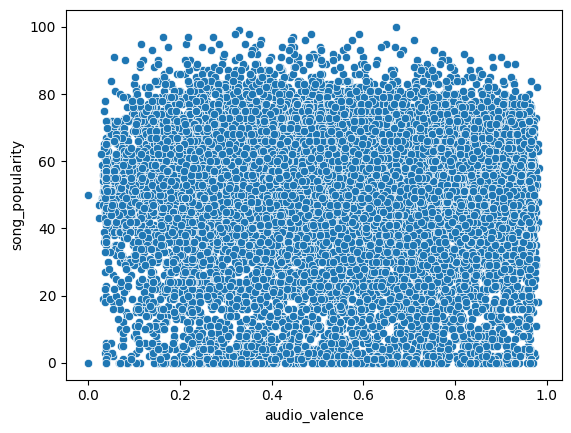

In [247]:
for i in numeric_features:
    sns.scatterplot(x=df3[i], y=df['song_popularity'])
    plt.show()

## (3)(b) Convert categorical features to numeric using dummy encoding

In [248]:
# backup df:
df1 = df.copy()

# Convert categorical features to numeric using dummy encoding
for feature in category_features:
    dummies = pd.get_dummies(df1[feature], prefix=feature)
    df1 = pd.concat([df, dummies], axis=1)
    df1.drop(feature, axis=1, inplace=True)

print(">>> df's shape after converting categorical features to numeric using dummy encoding:\n", df1.shape)
print(">>> Columns in new df:\n", df1.columns)
print(">>> First 5 records in new df:\n", df1.head())

>>> df's shape after converting categorical features to numeric using dummy encoding:
 (14924, 25)
>>> Columns in new df:
 Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11'],
      dtype='object')
>>> First 5 records in new df:
    song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  l

## (3)(b) Remove outliers


In [249]:
# backup df
df2 = df1.copy()

# remove outliners that is outside 60% of IQR for both Q1 and Q3 ends respectively
for i in numeric_features:
  Q1 = df2[i].quantile(0.25)
  Q3 = df2[i].quantile(0.75)
  IQR = Q3 - Q1
  df2 = df2[df2[i] <= (Q3+(1.6*IQR))]
  df2 = df2[df2[i] >= (Q1-(1.6*IQR))]
  df2 = df2.reset_index(drop=True)

print(">>> df's shape after removing outliers:\n", df2.shape)
print(">>> Number of outliers that was removed\n", df1.shape[0] - df2.shape[0])

>>> df's shape after removing outliers:
 (9236, 25)
>>> Number of outliers that was removed
 5688


In [250]:
category_features

['audio_mode', 'time_signature', 'key']

In [251]:
# Dropped Features -->  ['time_signature_4', 'energy', 'key_7', 'acousticness', 'danceability', 'key_1', 'key_11', 'key_9', 'key_2', 'loudness', 'audio_mode', 'key_5', 'speechiness', 'audio_valence', 'key_4', 'key_6', 'key_3', 'key_8']

df2.columns

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11'],
      dtype='object')

In [252]:
X = df2.drop(['energy', 'key_7', 'acousticness', 'danceability', 'key_1', 'key_11', 'key_9', 'key_2', 'loudness', 'audio_mode', 'key_5', 'speechiness', 'audio_valence', 'key_4', 'key_6', 'key_3', 'key_8'], axis=1)
Y = df2['song_popularity']

In [253]:
X.columns

Index(['song_popularity', 'song_duration_ms', 'instrumentalness', 'liveness',
       'tempo', 'time_signature', 'key_0', 'key_10'],
      dtype='object')

# 4) Split data into train and test datasets

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=40)
X_train.reset_index(drop=True,inplace=True)

print(">>> Size of trainig set: ", X_train.shape)
print(">>> Size of testing set: ", X_test.shape)

>>> Size of trainig set:  (7388, 8)
>>> Size of testing set:  (1848, 8)


# 5) Feature scaling

In [255]:
X_train.head()

,song_popularity,song_duration_ms,instrumentalness,liveness,tempo,time_signature,key_0,key_10
0,53,203427,0.000007,0.1390,96.005,4,True,False
1,75,177140,0.000000,0.0646,105.031,4,False,False
2,67,198306,0.000000,0.3230,124.960,4,False,False
3,21,168160,0.000000,0.1960,133.092,4,False,False
4,53,323480,0.001040,0.1810,140.030,4,False,False


In [256]:
# Apply scaling on columns of df
def scaler(temp_df):
  # Initialize the MinMaxScaler
  min_max_scaler = MinMaxScaler()

  # Fit the scaler to the data and transform it
  min_max_scaled_data = min_max_scaler.fit_transform(temp_df)

  temp_df = pd.DataFrame(min_max_scaled_data, columns=temp_df.columns)
  return temp_df

X_train = scaler(X_train)
X_test = scaler(X_test)

print (">>> Display first 5 records of training data after scaling:\n")
X_train.head()

>>> Display first 5 records of training data after scaling:



,song_popularity,song_duration_ms,instrumentalness,liveness,tempo,time_signature,key_0,key_10
0,0.53,0.448727,0.000786,0.290780,0.296571,0.75,1.0,0.0
1,0.75,0.344131,0.000000,0.120567,0.357653,0.75,0.0,0.0
2,0.67,0.428350,0.000000,0.711736,0.492519,0.75,0.0,0.0
3,0.21,0.308400,0.000000,0.421185,0.547551,0.75,0.0,0.0
4,0.53,0.926417,0.122209,0.386868,0.594502,0.75,0.0,0.0


In [257]:
print (">>> Display df's statistic after scaling:\n")
X_train.describe()

>>> Display df's statistic after scaling:



,song_popularity,song_duration_ms,instrumentalness,liveness,tempo,time_signature,key_0,key_10
count,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000
mean,0.505077,0.490599,0.055827,0.326764,0.463435,0.739882,0.113563,0.067136
std,0.205921,0.166798,0.158102,0.212949,0.186580,0.067021,0.317301,0.250274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390000,0.380603,0.000000,0.179593,0.322637,0.750000,0.000000,0.000000
50%,0.540000,0.478615,0.000304,0.245024,0.458648,0.750000,0.000000,0.000000
75%,0.660000,0.586345,0.013866,0.425761,0.581758,0.750000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6.  Train, fine tune, and evaluate model's performance

## Model Evaluation Functions

In [258]:
# calculates r2_score
def cal_r2(y_true, y_pred):
  r2 = r2_score(y_true, y_pred)
  return r2

# Calculates adjusted_r2
def cal_adj_r2(x_df, r2):
  number_variables = x_df[1] - 1
  adjusted_r2 = 1 - ((1-r2) * (x_df[0]-1)) / (x_df[0] - number_variables -1)
  return adjusted_r2

def cal_mse(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  return mse

def cal_performance(x_train_shape, x_test_shape, y_train, y_train_pred, y_test, y_test_pred):
  r2_train = cal_r2(y_train, y_train_pred)
  r2_test = cal_r2(y_test, y_test_pred)
  adj_r2_train = cal_adj_r2(x_train_shape, r2_train)
  adj_r2_test = cal_adj_r2(x_test_shape, r2_test)
  mse_train = cal_mse(y_train, y_train_pred)
  mse_test = cal_mse(y_test, y_test_pred)

  performance_dict = {
    'r2_train': r2_train,
    'r2_test': r2_test,
    'adj_r2_train': adj_r2_train,
    'adj_r2_test': adj_r2_test,
    'mse_train': mse_train,
    'mse_test': mse_test
    }
  return performance_dict

## 6a) Polynomial Regression (PR)

In [259]:

# specify degree of 3 for polynomial regression model
# include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_train_features = poly.fit_transform(X_train)
poly_test_features = poly.fit_transform(X_test)

# Create LinearRegression
pr = LinearRegression()

# train the model
pr.fit(poly_train_features, y_train)

pr_pred_train = pr.predict(poly_train_features)
pr_pred_test = pr.predict(poly_test_features)

In [260]:
pr_performance = cal_performance(X_train.shape, X_test.shape, y_train, pr_pred_train, y_test, pr_pred_test)
print(pr_performance)

{'r2_train': 1.0, 'r2_test': 0.988440277814401, 'adj_r2_train': 1.0, 'adj_r2_test': 0.988396300610434, 'mse_train': 3.248462311153558e-26, 'mse_test': 5.092415035773735}


## 6b) Multiple Linear Regression (mlr)

In [261]:
mlr = LinearRegression()
mlr_param = {'copy_X': [True, False], 'fit_intercept': [True, False], 'n_jobs': [1,5,10,15,None], 'positive': [True, False]}

random_search = RandomizedSearchCV(mlr, mlr_param, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

# Train the Elastic Net model with the best parameters
best_mlr = random_search.best_estimator_
best_mlr.fit(X_train, y_train)

# Predict on the test set
mlr_pred_train = best_mlr.predict(X_train)
mlr_pred_test = best_mlr.predict(X_test)

Best Hyperparameters: {'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best Score: 1.0


In [262]:
# Evalute performance
mlr_performance = cal_performance(X_train.shape, X_test.shape, y_train, mlr_pred_train, y_test, mlr_pred_test)
print(mlr_performance)

{'r2_train': 1.0, 'r2_test': 0.9884402778143995, 'adj_r2_train': 1.0, 'adj_r2_test': 0.9883963006104325, 'mse_train': 1.4479382819128533e-29, 'mse_test': 5.092415035774388}


## 6c) Elastic Net Regression (enr)

In [263]:
# Create an ElasticNet regression model instance
# l1_ratio corresponds to the mix of L1 and L2 regularization
# alpha corresponds to the strength of the regularization
enr = ElasticNet()

# Define the hyperparameters grid to search
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(enr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Train the Elastic Net model with the best parameters
best_elastic_net = grid_search.best_estimator_
best_elastic_net.fit(X_train, y_train)

# Predict on the test set
enr_pred_train = best_elastic_net.predict(X_train)
enr_pred_test = best_elastic_net.predict(X_test)

Best parameters found:  {'alpha': 0.1, 'fit_intercept': False, 'l1_ratio': 1.0, 'max_iter': 100}
Best cross-validation score (negative MSE):  -0.03845032815425334


In [264]:
# Evaluate the model
enr_performance = cal_performance(X_train.shape, X_test.shape, y_train, enr_pred_train, y_test, enr_pred_test)
print(enr_performance)

{'r2_train': 0.9999089027136213, 'r2_test': 0.9903122531527182, 'adj_r2_train': 0.9999088163069811, 'adj_r2_test': 0.99027539759406, 'mse_train': 0.038623308123045645, 'mse_test': 4.267752019968733}


## 6d) Decision Tree Regressor (dtr)

In [265]:
# Create a Decision Tree Regressor object
dtr = DecisionTreeRegressor(random_state=40)

# Fit the regressor to the training data
dtr.fit(X_train, y_train)

# Predict on the test data
dtr_pred_train = dtr.predict(X_train)
dtr_pred_test = dtr.predict(X_test)



In [266]:
# Evaluate the model
dtr_performance = cal_performance(X_train.shape, X_test.shape, y_train, dtr_pred_train, y_test, dtr_pred_test)
print(dtr_performance)

{'r2_train': 1.0, 'r2_test': 0.9884682632636859, 'adj_r2_train': 1.0, 'adj_r2_test': 0.988424392526102, 'mse_train': 0.0, 'mse_test': 5.08008658008658}


## 6e) Adaboost (ada)

In [267]:
# Define the AdaBoost Regressor model
adaboost = AdaBoostRegressor() # base estimator is DecisionTreeRegressor

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 1, 0.2, 0.5, 0.7, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Train the AdaBoost Regressor model with the best parameters
best_adaboost = grid_search.best_estimator_
best_adaboost.fit(X_train, y_train)

# Predict on the test data
ada_pred_train = best_adaboost.predict(X_train)
ada_pred_test = best_adaboost.predict(X_test)

Best parameters found:  {'learning_rate': 1, 'loss': 'square', 'n_estimators': 200}
Best cross-validation score (negative MSE):  -0.4530924539283664


In [268]:
# Evaluate the model
ada_performance = cal_performance(X_train.shape, X_test.shape, y_train, ada_pred_train, y_test, ada_pred_test)
print(ada_performance)

{'r2_train': 0.9988403986920612, 'r2_test': 0.9862620722372045, 'adj_r2_train': 0.9988392987992217, 'adj_r2_test': 0.9862098083815852, 'mse_train': 0.4916462432287353, 'mse_test': 6.051981940083983}


## 6f) Gradient Boosting Regressor (gbr)

In [269]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 1, 0.2, 0.5, 0.7, 1.0],
    'max_depth': [3,5,7,9,11,13,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(gbr, param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)


# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score (negative MSE): ", random_search.best_score_)

# Train the AdaBoost Regressor model with the best parameters
best_gbr = random_search.best_estimator_
best_gbr.fit(X_train, y_train)

# Predict on the test data
gbr_pred_train = best_gbr.predict(X_train)
gbr_pred_test = best_gbr.predict(X_test)


Best parameters found:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 9, 'learning_rate': 0.2}
Best cross-validation score (negative MSE):  -0.0009199305652910917


In [270]:
# Evaluate the model
gbr_performance = cal_performance(X_train.shape, X_test.shape, y_train, gbr_pred_train, y_test, gbr_pred_test)
print(gbr_performance)

{'r2_train': 0.9999999998567295, 'r2_test': 0.9884672783946056, 'adj_r2_train': 0.9999999998565936, 'adj_r2_test': 0.9884234039102372, 'mse_train': 6.074365109878913e-08, 'mse_test': 5.080520445367418}


## 6g) RBF SVC (RBF)

In [271]:
# Define the SVR model with RBF kernel
svr = SVR(kernel='rbf')

# Define the hyperparameters grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-3, 1e-2, 1e-1, 1]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Train the SVR model with the best parameters
best_svr = grid_search.best_estimator_
best_svr.fit(X_train, y_train)

# Predict on the test set
rbf_pred_train = best_svr.predict(X_train)
rbf_pred_test = best_svr.predict(X_test)

Best parameters found:  {'C': 100, 'gamma': 0.01}
Best cross-validation score (negative MSE):  -0.001219877313664334


In [272]:
# Evaluate the model
rbf_performance = cal_performance(X_train.shape, X_test.shape, y_train, rbf_pred_train, y_test, rbf_pred_test)
print(rbf_performance)

{'r2_train': 0.9999974022135044, 'r2_test': 0.9885417700877996, 'adj_r2_train': 0.9999973997494793, 'adj_r2_test': 0.9884981789957423, 'mse_train': 0.0011014061147555864, 'mse_test': 5.047704551319875}


## Compare performance

In [273]:
# convert dictionary to dataframe
pr_df  = pd.DataFrame.from_dict(pr_performance, orient='index', columns=['PR'])
mlr_df = pd.DataFrame.from_dict(mlr_performance, orient='index', columns=['MLR'])
enr_df = pd.DataFrame.from_dict(enr_performance, orient='index', columns=['ENR'])
dtr_df = pd.DataFrame.from_dict(dtr_performance, orient='index', columns=['DTR'])
ada_df = pd.DataFrame.from_dict(ada_performance, orient='index', columns=['ADA'])
gbr_df = pd.DataFrame.from_dict(gbr_performance, orient='index', columns=['GBR'])
rbf_df = pd.DataFrame.from_dict(rbf_performance, orient='index', columns=['RBF'])

df_performance = pd.concat([pr_df, mlr_df, enr_df, dtr_df, ada_df, gbr_df, rbf_df], axis=1)
print(">>> Comparision of model performance:\n")
df_performance

>>> Comparision of model performance:



,PR,MLR,ENR,DTR,ADA,GBR,RBF
r2_train,1.000000e+00,1.000000e+00,0.999909,1.000000,0.998840,1.000000e+00,0.999997
r2_test,9.884403e-01,9.884403e-01,0.990312,0.988468,0.986262,9.884673e-01,0.988542
adj_r2_train,1.000000e+00,1.000000e+00,0.999909,1.000000,0.998839,1.000000e+00,0.999997
adj_r2_test,9.883963e-01,9.883963e-01,0.990275,0.988424,0.986210,9.884234e-01,0.988498
mse_train,3.248462e-26,1.447938e-29,0.038623,0.000000,0.491646,6.074365e-08,0.001101
mse_test,5.092415e+00,5.092415e+00,4.267752,5.080087,6.051982,5.080520e+00,5.047705


Observation from comparison table above:
* DTR has best performance as it got high r2

## 6h) Perform stacking on base models (STA)

In [274]:
# Define the base estimators
#base_estimators = [pr, best_mlr, best_elastic_net, best_adaboost, best_gbr, best_svr]

base_estimators = [
    ('pr', pr),
    ('dtr', dtr),
    ('gbr', best_gbr),
]

# Create the Stacking Regressor with a Linear Regression meta-regressor
stacking_regressor = StackingRegressor(
    estimators=base_estimators,
    cv=5
)

# Fit the stacking regressor
stacking_regressor.fit(X_train, y_train)

# Predict on the test data
stack_pred_train = stacking_regressor.predict(X_train)
stack_pred_test = stacking_regressor.predict(X_test)

In [275]:
# Evaluate the model
stacking_performance = cal_performance(X_train.shape, X_test.shape, y_train, stack_pred_train, y_test, stack_pred_test)
print(stacking_performance)

{'r2_train': 0.9999999999998682, 'r2_test': 0.9884434785571385, 'adj_r2_train': 0.9999999999998681, 'adj_r2_test': 0.9883995135299103, 'mse_train': 5.5861598499992856e-11, 'mse_test': 5.091005009634656}


validation

In [278]:
print(y_test[0:20].values)
print(stack_pred_test[:20])

[83 80 76 75 63 24  4 34 69 72 60 69  6 20 51 67 57 25 48 65]
[86.45117081 83.32812348 79.16406425 78.1230499  65.63088083 24.99999608
  4.164047   35.41013704 71.87696557 75.00000813 62.49217105 71.87696524
  6.24607477 20.83594019 53.12304424 69.79493741 59.36912869 26.04101014
 50.00000169 67.71290921]
